<a href="https://colab.research.google.com/github/Slmeliga/Slmeliga/blob/main/Another_copy_of_ASSIGNMENT_ON_WEBSCRAPPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT ON WEB SCRAPPING**
Pick any website(s) of choice, convert data to a dataframe in Python, clean data, and analyze.

Explain your workflow and output.

I will be going into a  wikipedia site and try to extract some data to analyze and also visualize.

This will give us some insights on their listings.
The website of choice is **https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue**


In [ ]:
#import web scrapping libraries
import requests
from bs4 import BeautifulSoup
#import data wrangling and visualization tools
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import requests

#making a get request
page = requests.get('https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue')
page

<Response [200]>

In [ ]:
#see content of request
page.content

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of largest companies in the United States by revenue - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpre

Using BeautifulSoup to make the content more readable by parsing the HTML.....

In [ ]:
soup = BeautifulSoup(page.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinn

In [ ]:
# check webpage title
soup.title

<title>List of largest companies in the United States by revenue - Wikipedia</title>

In [ ]:
# to make it readable
soup.title.string

'List of largest companies in the United States by revenue - Wikipedia'

To identify the elements and tags containing the data needed. In this case, the table containing list of  FORTUNE GLOBAL LIST 2023......

In [ ]:
soup.a

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>

In [ ]:
# to find all the links in the page
soup.find_all('table')[1]

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [ ]:
table = soup.find_all('table')[1]
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [ ]:
world_titles = table.find_all('th')
print(world_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [ ]:
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)


['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [ ]:
import pandas as pd
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [ ]:
column_data = table.find_all('tr')

In [ ]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)
    lenght = len(df)
    df.loc[lenght] = individual_row_data

['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'ExxonMobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology and cloud computing', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'Cencora', 'Pharmacy wholesale', '238

In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


Next step is to clean the data by dropping the duplicate of the data set completely

In [ ]:
df = df.drop_duplicates()
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


The next is to strip the dataset of some unwanted elements

In [ ]:
#we will work on the column Revenue growth
df['Revenue growth'] = df['Revenue growth'].str.strip('%')
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5,"130,000","Waltham, Massachusetts"


Using the astype() method, we can change the** Revenue (USD millions)** and **Employees** who are both in string form to float respectively......

In [ ]:
df = df.assign(
    Revenue_USD_millions=df['Revenue (USD millions)'].astype(str).str.replace(',', '').astype(float)
)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue_USD_millions
0,1,Walmart,Retail,"611,289",6.7,"2,100,000","Bentonville, Arkansas",611289.0
1,2,Amazon,Retail and cloud computing,"513,983",9.4,"1,540,000","Seattle, Washington",513983.0
2,3,ExxonMobil,Petroleum industry,"413,680",44.8,"62,000","Spring, Texas",413680.0
3,4,Apple,Electronics industry,"394,328",7.8,"164,000","Cupertino, California",394328.0
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,"400,000","Minnetonka, Minnesota",324162.0
...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6,"71,100","Richfield, Minnesota",46298.0
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5,"34,300","New York City, New York",46159.0
97,98,United Airlines,Airline,"44,955",82.5,"92,795","Chicago, Illinois",44955.0
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5,"130,000","Waltham, Massachusetts",44915.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    object 
 4   Revenue growth          100 non-null    object 
 5   Employees               100 non-null    object 
 6   Headquarters            100 non-null    object 
 7   Revenue_USD_millions    100 non-null    float64
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


In [ ]:
import re

# Define a function to extract numbers from strings
def extract_numbers(s):
    numbers = re.findall(r'\d+\.?\d*', s)
    if numbers:
        return float(numbers[0])
    else:
        return None

# Apply the function to the 'Employees' column
df['Employees'] = df['Employees'].apply(lambda x: extract_numbers(str(x)))

# Display the DataFrame
df


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue_USD_millions
0,1,Walmart,Retail,"611,289",6.7,2.0,"Bentonville, Arkansas",611289.0
1,2,Amazon,Retail and cloud computing,"513,983",9.4,1.0,"Seattle, Washington",513983.0
2,3,ExxonMobil,Petroleum industry,"413,680",44.8,62.0,"Spring, Texas",413680.0
3,4,Apple,Electronics industry,"394,328",7.8,164.0,"Cupertino, California",394328.0
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,400.0,"Minnetonka, Minnesota",324162.0
...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6,71.0,"Richfield, Minnesota",46298.0
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5,34.0,"New York City, New York",46159.0
97,98,United Airlines,Airline,"44,955",82.5,92.0,"Chicago, Illinois",44955.0
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5,130.0,"Waltham, Massachusetts",44915.0


In [ ]:
df['Employees'] = df['Employees'].astype(str)
df['Employees'] = df['Employees'].str.replace('[^0-9.]', '').astype(float)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue_USD_millions
0,1,Walmart,Retail,"611,289",6.7,2.0,"Bentonville, Arkansas",611289.0
1,2,Amazon,Retail and cloud computing,"513,983",9.4,1.0,"Seattle, Washington",513983.0
2,3,ExxonMobil,Petroleum industry,"413,680",44.8,62.0,"Spring, Texas",413680.0
3,4,Apple,Electronics industry,"394,328",7.8,164.0,"Cupertino, California",394328.0
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,400.0,"Minnetonka, Minnesota",324162.0
...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6,71.0,"Richfield, Minnesota",46298.0
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5,34.0,"New York City, New York",46159.0
97,98,United Airlines,Airline,"44,955",82.5,92.0,"Chicago, Illinois",44955.0
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5,130.0,"Waltham, Massachusetts",44915.0


In [ ]:
df['Rank'] = df['Rank'].astype(str)
df['Rank'] = df['Rank'].str.replace('[^0-9.]', '').astype(float)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue_USD_millions
0,1.0,Walmart,Retail,"611,289",6.7,2.0,"Bentonville, Arkansas",611289.0
1,2.0,Amazon,Retail and cloud computing,"513,983",9.4,1.0,"Seattle, Washington",513983.0
2,3.0,ExxonMobil,Petroleum industry,"413,680",44.8,62.0,"Spring, Texas",413680.0
3,4.0,Apple,Electronics industry,"394,328",7.8,164.0,"Cupertino, California",394328.0
4,5.0,UnitedHealth Group,Healthcare,"324,162",12.7,400.0,"Minnetonka, Minnesota",324162.0
...,...,...,...,...,...,...,...,...
95,96.0,Best Buy,Retail,"46,298",10.6,71.0,"Richfield, Minnesota",46298.0
96,97.0,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5,34.0,"New York City, New York",46159.0
97,98.0,United Airlines,Airline,"44,955",82.5,92.0,"Chicago, Illinois",44955.0
98,99.0,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5,130.0,"Waltham, Massachusetts",44915.0


In [ ]:
df['Revenue growth'] = df['Revenue growth'].astype(str)
df['Revenue growth'] = df['Revenue growth'].str.replace('[^0-9.]', '').astype(float)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue_USD_millions
0,1.0,Walmart,Retail,"611,289",6.7,2.0,"Bentonville, Arkansas",611289.0
1,2.0,Amazon,Retail and cloud computing,"513,983",9.4,1.0,"Seattle, Washington",513983.0
2,3.0,ExxonMobil,Petroleum industry,"413,680",44.8,62.0,"Spring, Texas",413680.0
3,4.0,Apple,Electronics industry,"394,328",7.8,164.0,"Cupertino, California",394328.0
4,5.0,UnitedHealth Group,Healthcare,"324,162",12.7,400.0,"Minnetonka, Minnesota",324162.0
...,...,...,...,...,...,...,...,...
95,96.0,Best Buy,Retail,"46,298",10.6,71.0,"Richfield, Minnesota",46298.0
96,97.0,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5,34.0,"New York City, New York",46159.0
97,98.0,United Airlines,Airline,"44,955",82.5,92.0,"Chicago, Illinois",44955.0
98,99.0,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5,130.0,"Waltham, Massachusetts",44915.0


 By using the astype() method:The dataframe duplicated another column for **REVENUE   (USD MILLION)**, as a result of this; i will be using the drop method to remove the duplicated column.....

In [ ]:

    df.drop(columns=('Revenue (USD millions)'),axis=1,inplace= True)
    df.head(10)

,Rank,Name,Industry,Revenue growth,Employees,Headquarters,Revenue_USD_millions
0,1.0,Walmart,Retail,6.7,2.0,"Bentonville, Arkansas",611289.0
1,2.0,Amazon,Retail and cloud computing,9.4,1.0,"Seattle, Washington",513983.0
2,3.0,ExxonMobil,Petroleum industry,44.8,62.0,"Spring, Texas",413680.0
3,4.0,Apple,Electronics industry,7.8,164.0,"Cupertino, California",394328.0
4,5.0,UnitedHealth Group,Healthcare,12.7,400.0,"Minnetonka, Minnesota",324162.0
5,6.0,CVS Health,Healthcare,10.4,259.0,"Woonsocket, Rhode Island",322467.0
6,7.0,Berkshire Hathaway,Conglomerate,9.4,383.0,"Omaha, Nebraska",302089.0
7,8.0,Alphabet,Technology and cloud computing,9.8,156.0,"Mountain View, California",282836.0
8,9.0,McKesson Corporation,Health,4.8,48.0,"Irving, Texas",276711.0
9,10.0,Chevron Corporation,Petroleum industry,51.6,43.0,"San Ramon, California",246252.0


In [ ]:
#rename the Revenue growth to Revenue_groth

df.rename(columns={"Revenue growth": "Revenue_growth"}, inplace=True)
df.head(10)

,Rank,Name,Industry,Revenue_growth,Employees,Headquarters,Revenue_USD_millions
0,1.0,Walmart,Retail,6.7,2.0,"Bentonville, Arkansas",611289.0
1,2.0,Amazon,Retail and cloud computing,9.4,1.0,"Seattle, Washington",513983.0
2,3.0,ExxonMobil,Petroleum industry,44.8,62.0,"Spring, Texas",413680.0
3,4.0,Apple,Electronics industry,7.8,164.0,"Cupertino, California",394328.0
4,5.0,UnitedHealth Group,Healthcare,12.7,400.0,"Minnetonka, Minnesota",324162.0
5,6.0,CVS Health,Healthcare,10.4,259.0,"Woonsocket, Rhode Island",322467.0
6,7.0,Berkshire Hathaway,Conglomerate,9.4,383.0,"Omaha, Nebraska",302089.0
7,8.0,Alphabet,Technology and cloud computing,9.8,156.0,"Mountain View, California",282836.0
8,9.0,McKesson Corporation,Health,4.8,48.0,"Irving, Texas",276711.0
9,10.0,Chevron Corporation,Petroleum industry,51.6,43.0,"San Ramon, California",246252.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  100 non-null    float64
 1   Name                  100 non-null    object 
 2   Industry              100 non-null    object 
 3   Revenue_growth        100 non-null    float64
 4   Employees             100 non-null    float64
 5   Headquarters          100 non-null    object 
 6   Revenue_USD_millions  100 non-null    float64
dtypes: float64(4), object(3)
memory usage: 6.2+ KB


In [ ]:
df.describe()

,Rank,Revenue_growth,Employees,Revenue_USD_millions
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,19.576000,131.420000,117566.460000
std,29.011492,21.463397,127.887196,100915.112163
min,1.000000,0.500000,1.000000,44200.000000
25%,25.750000,4.375000,41.000000,57876.000000
50%,50.500000,11.700000,83.000000,80824.500000
75%,75.250000,23.625000,183.000000,138763.000000
max,100.000000,97.200000,576.000000,611289.000000


I will be using a different approach to analyze this dataframe depending on the most suitable.

**FIRST STEP:**

Top 10 biggest company

**SECOND STEP:**

Revenue growth of each company/'Top 10 Companies with Rising Incomes

**THIRD STEP:**

The Top 10 Most Profitable Industry

**FOURTH STEP:**

The Top 10 most employable Industry/Sector




**FIRST STEP:**

Top 10 biggest company

In [ ]:
#importing our libaries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

Name = df["Name"]
Rank = df["Rank"]
data_Name = {
    'Name': Name,
    'Rank': Rank
}
data_Name = pd.DataFrame(data_Name, index=range(len(Rank))).iloc[:12]
data_Name.head(12)

,Name,Rank
0,Walmart,1.0
1,Amazon,2.0
2,ExxonMobil,3.0
3,Apple,4.0
4,UnitedHealth Group,5.0
5,CVS Health,6.0
6,Berkshire Hathaway,7.0
7,Alphabet,8.0
8,McKesson Corporation,9.0
9,Chevron Corporation,10.0


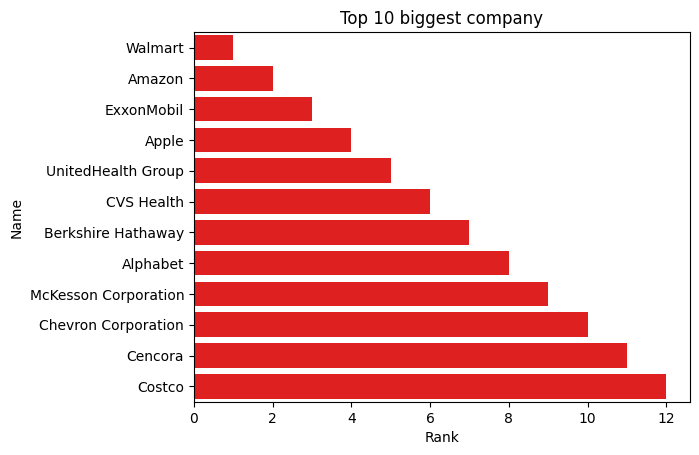

In [ ]:
import seaborn as sns

sns.barplot(x=data_Name['Rank'], y=data_Name['Name'], color='r')

# Adding title and labels
plt.xlabel("Rank")
plt.ylabel("Name")
plt.title('Top 10 biggest company')

# Display the plot
plt.show()


**SECOND STEP:**

 Revenue growth of each company/Top 10 Companies with Rising Incomes

In [ ]:
Name = df["Name"]
Revenue_growth = df["Revenue_growth"]
data_Name = {
    'Name': Name,
    'Revenue_growth': Revenue_growth
}
data_Name = pd.DataFrame(data_Name, index=range(len(Name))).iloc[:12]
data_Name.head(12)

,Name,Revenue_growth
0,Walmart,6.7
1,Amazon,9.4
2,ExxonMobil,44.8
3,Apple,7.8
4,UnitedHealth Group,12.7
5,CVS Health,10.4
6,Berkshire Hathaway,9.4
7,Alphabet,9.8
8,McKesson Corporation,4.8
9,Chevron Corporation,51.6


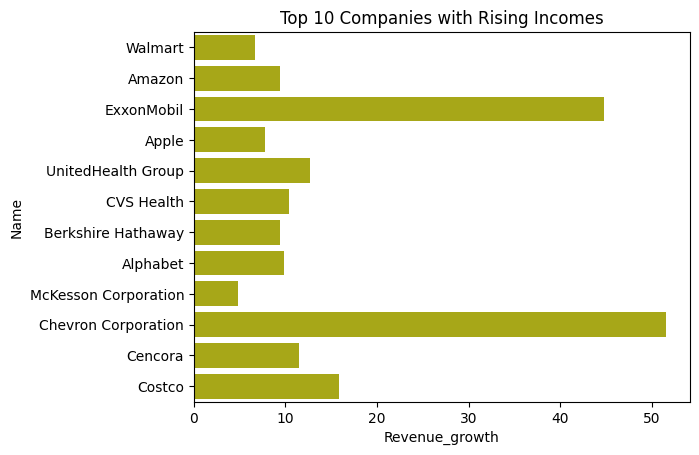

In [ ]:
import seaborn as sns

sns.barplot(x=data_Name['Revenue_growth'], y=data_Name['Name'], color='y')

# Adding title and labels
plt.xlabel("Revenue_growth")
plt.ylabel("Name")
plt.title('Top 10 Companies with Rising Incomes')

# Display the plot
plt.show()


THIRD STEP:

The Top 10 Most Profitable Industry

In [ ]:
Industry = df["Industry"]
Revenue_growth = df["Revenue_growth"]
data_Industry = {
    'Industry': Industry,
    'Revenue_growth': Revenue_growth
}
data_Industry = pd.DataFrame(data_Industry, index=range(len(Industry))).iloc[:13]
data_Industry.head(14)

,Industry,Revenue_growth
0,Retail,6.7
1,Retail and cloud computing,9.4
2,Petroleum industry,44.8
3,Electronics industry,7.8
4,Healthcare,12.7
5,Healthcare,10.4
6,Conglomerate,9.4
7,Technology and cloud computing,9.8
8,Health,4.8
9,Petroleum industry,51.6


In [ ]:
import pandas as pd
data_Industry = pd.DataFrame(data_Industry, index=range(len(Industry))).iloc[:12]

# Create the line plot
plt.figure(figsize=(15,6))
fig = px.line(data_Industry, x='Industry', y='Revenue_growth', title='Top 10 most Profitable Industry')

# Display the plot
fig.show()

<Figure size 1500x600 with 0 Axes>

FOURTH STEP:

The Top 10 most employable Industry/Sector

In [ ]:
Industry = df["Industry"]
Employees = df["Employees"]
data_Industry = {
    'Industry': Industry,
    'Employees': Employees
}
data_Industry = pd.DataFrame(data_Industry, index=range(len(Industry))).iloc[:12]
data_Industry.head(12)

,Industry,Employees
0,Retail,2.0
1,Retail and cloud computing,1.0
2,Petroleum industry,62.0
3,Electronics industry,164.0
4,Healthcare,400.0
5,Healthcare,259.0
6,Conglomerate,383.0
7,Technology and cloud computing,156.0
8,Health,48.0
9,Petroleum industry,43.0


In [ ]:
import pandas as pd
data_Industry = pd.DataFrame(data_Industry, index=range(len(Industry))).iloc[:12]

# Create the line plot
plt.figure(figsize=(15,6))
fig = px.line(data_Industry, x='Industry', y='Employees', title='Top 10 most Employable Industry?Sector')

# Display the plot
fig.show()

<Figure size 1500x600 with 0 Axes>

In [ ]:
Name = df["Name"]
Revenue_USD_millions = df["Revenue_USD_millions"]
data_Name = {
    'Name': Name,
    'Revenue_USD_millions': Revenue_USD_millions
}
data_Name = pd.DataFrame(data_Name, index=range(len(Industry))).iloc[:12]
data_Name.head(12)

,Name,Revenue_USD_millions
0,Walmart,611289.0
1,Amazon,513983.0
2,ExxonMobil,413680.0
3,Apple,394328.0
4,UnitedHealth Group,324162.0
5,CVS Health,322467.0
6,Berkshire Hathaway,302089.0
7,Alphabet,282836.0
8,McKesson Corporation,276711.0
9,Chevron Corporation,246252.0


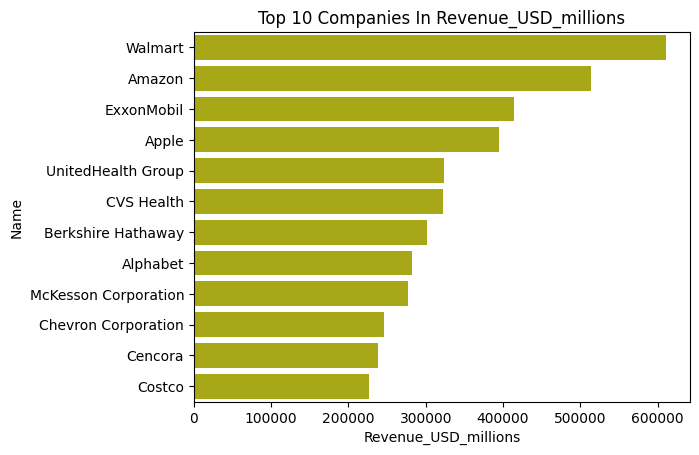

In [ ]:
import seaborn as sns

sns.barplot(x=data_Name['Revenue_USD_millions'], y=data_Name['Name'], color='y')

# Adding title and labels
plt.xlabel("Revenue_USD_millions")
plt.ylabel("Name")
plt.title('Top 10 Companies In Revenue_USD_millions')

# Display the plot
plt.show()
